# Practical session 2 - Practise with classic libraries

Students (pair):
- [DELANNOY Rosalie]([link](https://github.com/rosedel05))
- [DOS RAMOS Carl]([link](https://github.com/carldosramos8-prog))

```
conda create --name=lab2 --file=requirement.txt
conda activate lab2
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab2
```

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [138]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

We fix NumPy's random generator with a constant seed so the draws are reproducible across runs.


In [140]:
from pathlib import Path
import numpy as np

LAB2_DIR = Path.cwd()

RNG_SEED = 2024
rng = np.random.default_rng(RNG_SEED)
probe_draw = rng.uniform(size=5)
np.testing.assert_allclose(probe_draw, np.random.default_rng(RNG_SEED).uniform(size=5))  # verify reproducibility
probe_draw


array([0.67583134, 0.2143232 , 0.30945203, 0.7994661 , 0.9958021 ])

2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

We generate 100000 Gamma samples with shape alpha=9 and rate beta=2 (scale 1/beta) and store them for later reuse.


In [141]:
alpha, beta = 9, 2
sample_size = 100_000
rng = np.random.default_rng(RNG_SEED)
samples = rng.gamma(shape=alpha, scale=1 / beta, size=sample_size)
data_dir = LAB2_DIR / 'data'
data_dir.mkdir(parents=True, exist_ok=True)
samples_path = data_dir / 'samples.npy'
np.save(samples_path, samples)
samples_path


WindowsPath('c:/Users/cdosramo/Documents/LAB1-DELANNOY-DOS-RAMOS/Labs/Lab2/data/samples.npy')

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

Using the Freedman-Diaconis rule for the bins gives a stable density estimate while keeping the histogram normalized.


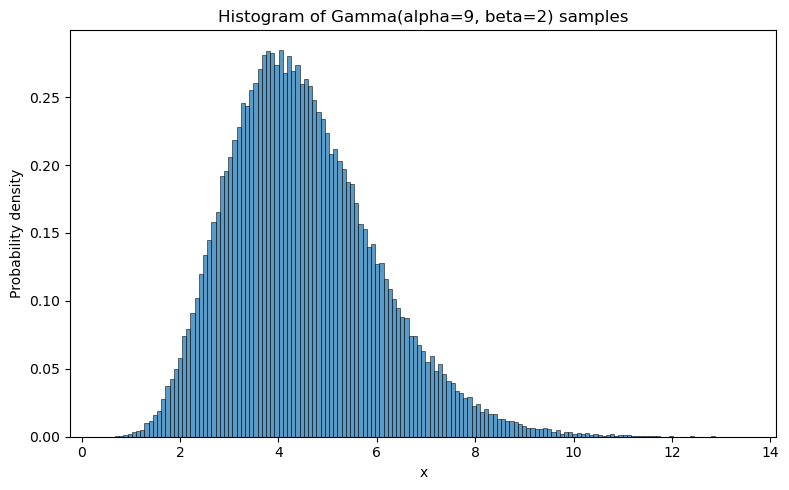

In [142]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
hist_counts, hist_bin_edges, _ = ax.hist(
    samples,
    bins='fd',
    density=True,
    alpha=0.74,
    edgecolor='black',
    linewidth=0.5
)
ax.set(title='Histogram of Gamma(alpha=9, beta=2) samples', xlabel='x', ylabel='Probability density')
fig.tight_layout()


4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

The analytical pdf sits on top of the histogram; only minor fluctuations remain in the tails because of the finite sample size.


WindowsPath('c:/Users/cdosramo/Documents/LAB1-DELANNOY-DOS-RAMOS/Labs/Lab2/figures/gamma_histogram.png')

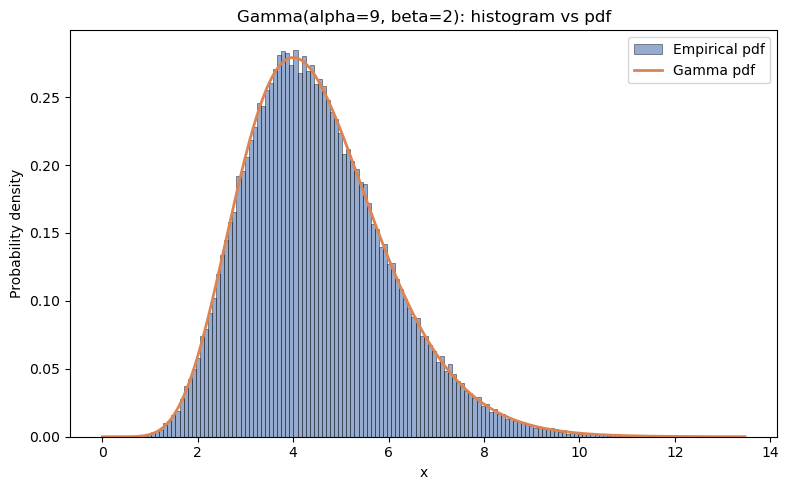

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma as gamma_dist

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(
    samples,
    bins=hist_bin_edges,
    density=True,
    alpha=0.59,
    color='#4C72B0',
    edgecolor='black',
    linewidth=0.5,
    label='Empirical pdf'
)
x = np.linspace(0, hist_bin_edges[-1], 600)
ax.plot(x, gamma_dist(a=alpha, scale=1 / beta).pdf(x), color='#DD8452', linewidth=2.0, label='Gamma pdf')
ax.set(title='Gamma(alpha=9, beta=2): histogram vs pdf', xlabel='x', ylabel='Probability density')
ax.legend()
fig.tight_layout()
figures_dir = LAB2_DIR / 'figures'
figures_dir.mkdir(parents=True, exist_ok=True)
figure_path = figures_dir / 'gamma_histogram.png'
fig.savefig(figure_path, dpi=150)
figure_path


---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

Load the CSV with pandas, sort the entries by infant mortality, and summarise both columns with standard descriptive statistics (variance uses ddof=1 as in pandas).


In [144]:
import pandas as pd
from IPython.display import display

data_path = LAB2_DIR / 'data' / 'data.csv'
df = pd.read_csv(data_path)
df_sorted = df.sort_values('X').reset_index(drop=True)
display(df_sorted)

summary_table = df_sorted.agg(['median', 'mean', 'var', 'std']).T
summary_table.index.name = 'variable'
summary_table.columns = [name.capitalize() for name in summary_table.columns]
summary_table


,X,Y
0,56,37
1,68,34
2,98,25
3,110,36
4,128,28
5,180,24
6,181,20
7,190,24
8,192,22
9,197,24


,Median,Mean,Var,Std
variable,,,,
X,180.5,153.750000,3486.022727,59.042550
Y,24.0,25.916667,42.446970,6.515134


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

A least-squares fit yields $\hat Y = -0.0982\,X + 41.01$ (slope and intercept rounded to four decimals).


In [145]:
import numpy as np

x = df_sorted['X'].to_numpy()
y = df_sorted['Y'].to_numpy()
coeffs = np.polyfit(x, y, deg=1)
regression_poly = np.poly1d(coeffs)
slope, intercept = coeffs
{'slope': slope, 'intercept': intercept}


{'slope': -0.09816474883463176, 'intercept': 41.00949679999129}

3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

The regression line tracks the downward trend: wealthier countries (lower infant mortality) tend to have higher GNP per inhabitant.


WindowsPath('c:/Users/cdosramo/Documents/LAB1-DELANNOY-DOS-RAMOS/Labs/Lab2/figures/infant_mortality_regression.png')

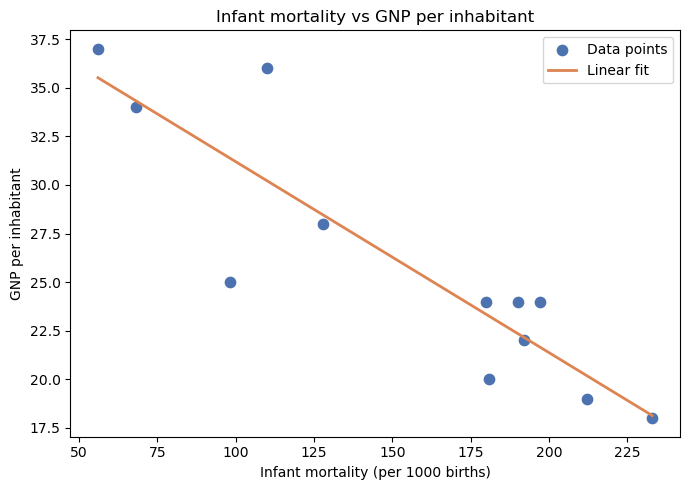

In [146]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x, y, color='#4C72B0', s=55, label='Data points')
x_line = np.linspace(x.min(), x.max(), 200)
ax.plot(x_line, regression_poly(x_line), color='#DD8452', linewidth=2.0, label='Linear fit')
ax.set(title='Infant mortality vs GNP per inhabitant', xlabel='Infant mortality (per 1000 births)', ylabel='GNP per inhabitant')
ax.legend()
fig.tight_layout()
figures_dir = LAB2_DIR / 'figures'
figures_dir.mkdir(parents=True, exist_ok=True)
regression_plot_path = figures_dir / 'infant_mortality_regression.png'
fig.savefig(regression_plot_path, dpi=150)
regression_plot_path


---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

Forward finite differences along columns and rows give the discrete gradient while zero-padding the borders.


In [147]:
import numpy as np

def gradient2D(x: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    if x.ndim != 2:
        raise ValueError('gradient2D expects a 2-D array.')
    grad_h = np.zeros_like(x)
    grad_v = np.zeros_like(x)
    grad_h[:, :-1] = x[:, 1:] - x[:, :-1]
    grad_v[:-1, :] = x[1:, :] - x[:-1, :]
    return grad_h, grad_v


2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

Unit tests cover the output shape and verify that constant inputs yield a zero gradient for both square and rectangular matrices.


In [148]:
import numpy as np

def test_gradient2D_constant_square() -> None:
    mat = np.ones((3, 3), dtype=float)
    grad_h, grad_v = gradient2D(mat)
    assert grad_h.shape == mat.shape
    assert grad_v.shape == mat.shape
    np.testing.assert_array_equal(grad_h, np.zeros_like(mat))
    np.testing.assert_array_equal(grad_v, np.zeros_like(mat))

def test_gradient2D_constant_rectangular() -> None:
    mat = np.full((2, 5), 7.5)
    grad_h, grad_v = gradient2D(mat)
    assert grad_h.shape == mat.shape
    assert grad_v.shape == mat.shape
    np.testing.assert_array_equal(grad_h, np.zeros_like(mat))
    np.testing.assert_array_equal(grad_v, np.zeros_like(mat))

test_gradient2D_constant_square()
test_gradient2D_constant_rectangular()
print('gradient2D unit tests passed.')


gradient2D unit tests passed.


3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

The documentation details supported shapes, return values, and boundary handling.


In [149]:
gradient2D.__doc__ = '''Compute the forward finite-difference gradient of a 2-D array.

Parameters
----------
x : np.ndarray
    Real or complex 2-D array representing the signal/image.

Returns
-------
grad_h : np.ndarray
    Horizontal forward differences with a zero-padded last column.
grad_v : np.ndarray
    Vertical forward differences with a zero-padded last row.

Raises
------
ValueError
    If ``x`` is not 2-D.
'''
gradient2D.__doc__


'Compute the forward finite-difference gradient of a 2-D array.\n\nParameters\n----------\nx : np.ndarray\n    Real or complex 2-D array representing the signal/image.\n\nReturns\n-------\ngrad_h : np.ndarray\n    Horizontal forward differences with a zero-padded last column.\ngrad_v : np.ndarray\n    Vertical forward differences with a zero-padded last row.\n\nRaises\n------\nValueError\n    If ``x`` is not 2-D.\n'

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

The TV is the sum of the magnitudes of the gradient components; we reuse `gradient2D` and add regression tests.


In [150]:
import numpy as np

def tv(x: np.ndarray) -> float:
    """Compute the isotropic discrete total variation of a 2-D array.

    Parameters
    ----------
    x : np.ndarray
        Real or complex 2-D array.

    Returns
    -------
    float
        Sum of per-pixel Euclidean norms of the forward differences.
    """
    grad_h, grad_v = gradient2D(x)
    magnitudes = np.hypot(np.abs(grad_h), np.abs(grad_v))
    return float(np.sum(magnitudes))

def test_tv_zero() -> None:
    mat = np.zeros((4, 4))
    assert tv(mat) == 0.0

def test_tv_simple_step() -> None:
    mat = np.array([[0.0, 0.0], [1.0, 1.0]])
    np.testing.assert_allclose(tv(mat), 2.0)

test_tv_zero()
test_tv_simple_step()
print('tv unit tests passed.')


tv unit tests passed.


5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

We form the adjoint by accumulating backward differences with matching boundary treatment in each direction.


In [151]:
import numpy as np

def gradient2D_adjoint(grad: tuple[np.ndarray, np.ndarray]) -> np.ndarray:
    y_h, y_v = grad
    if y_h.ndim != 2 or y_v.ndim != 2:
        raise ValueError('gradient2D_adjoint expects two 2-D arrays.')
    if y_h.shape != y_v.shape:
        raise ValueError('Both components must share the same shape.')
    m, n = y_h.shape
    adj = np.zeros_like(y_h)
    # Horizontal contribution (transpose of forward differences)
    if n >= 1:
        adj[:, 0] -= y_h[:, 0]
    if n > 1:
        adj[:, 1:-1] += y_h[:, :-2] - y_h[:, 1:-1]
        adj[:, -1] += y_h[:, -2]
    # Vertical contribution
    if m >= 1:
        adj[0, :] -= y_v[0, :]
    if m > 1:
        adj[1:-1, :] += y_v[:-2, :] - y_v[1:-1, :]
        adj[-1, :] += y_v[-2, :]
    return adj


6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^T \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

> `np.conj` is useful.

Checks include output shape and the adjoint relation using reproducible pseudo-random matrices.


In [152]:
import numpy as np

def test_gradient2D_adjoint_shape() -> None:
    rng = np.random.default_rng(RNG_SEED)
    x_shape = (4, 5)
    y_h = rng.standard_normal(x_shape)
    y_v = rng.standard_normal(x_shape)
    adj = gradient2D_adjoint((y_h, y_v))
    assert adj.shape == x_shape

def test_gradient2D_adjoint_property() -> None:
    rng = np.random.default_rng(RNG_SEED + 1)
    x = rng.standard_normal((3, 4)) + 1j * rng.standard_normal((3, 4))
    y_h = rng.standard_normal((3, 4)) + 1j * rng.standard_normal((3, 4))
    y_v = rng.standard_normal((3, 4)) + 1j * rng.standard_normal((3, 4))
    grad_x = gradient2D(x)
    lhs = np.vdot(grad_x[0], y_h) + np.vdot(grad_x[1], y_v)
    rhs = np.vdot(x, gradient2D_adjoint((y_h, y_v)))
    np.testing.assert_allclose(lhs, rhs, rtol=1e-10, atol=1e-10)

def test_gradient2D_adjoint_thin() -> None:
    rng = np.random.default_rng(RNG_SEED + 2)
    x = rng.standard_normal((1, 4))
    y_h = rng.standard_normal((1, 4))
    y_v = rng.standard_normal((1, 4))
    gradient2D_adjoint((y_h, y_v))  # should not raise

test_gradient2D_adjoint_shape()
test_gradient2D_adjoint_property()
test_gradient2D_adjoint_thin()
print('gradient2D_adjoint unit tests passed.')


gradient2D_adjoint unit tests passed.


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
\begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [153]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
